In [7]:
import pickle
import numpy as np
from bff_processor.plotting_utils import meta_df, make_stack_boost, plot_w_error_boost, double_list, plot_w_error, make_plot_boost
from bff_processor.utils import make_view, ratio_plot_template, nratio_plot_template
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mplhep as hep
hep.set_style(hep.style.CMS)
import pickle
import pandas as pd
import boost_histogram as bh

In [16]:
lumi=35.5
era=2016
pkl_name = '2016_dilepmass'
with open(pkl_name+'.pkl','rb') as f:
    reg_dict_temp = pickle.load(f)
    
pkl_name = '2016_dilepmass_data'
with open(pkl_name+'.pkl','rb') as f:
    reg_dict_temp_data = pickle.load(f)


In [21]:
def plot_region(reg, top, bottom, mc_color = 'orange'):

    #mc background
    snom,_,colors,labels = make_stack_boost(meta_df[meta_df.type=='background'],reg_dict_temp, reg, sum_hist=False)
    centers = snom[0].axes[0].centers
    edges = snom[0].axes[0].edges
    dedges = double_list(edges)[1:-1]
    top.stackplot(dedges,*[double_list(s.values()) for s in snom],alpha=.5, colors=colors, labels=labels)
    
    bhist  = make_stack_boost(meta_df[meta_df.type=='background'],reg_dict_temp, reg)
    bnom, bunc = plot_w_error_boost(top,*bhist, color=mc_color, label='MC')
    
    #data
    dhist = make_stack_boost(meta_df[meta_df.type=='data'],reg_dict_temp_data, reg)
    if dhist[0]:
        dnom, dunc = plot_w_error_boost(top,*dhist, color='black', label='data')
    
    for i,row in meta_df[meta_df.type=='signal'].iterrows():
        sighist  = make_stack_boost(meta_df[meta_df.hname==row.hname],reg_dict_temp, reg)
        if sighist[0]:
            plot_w_error_boost(top,*sighist, color=row.color, label=row.label)
    top.set_yscale('log')
    top.legend(ncol=2)
    top.set_ylim(top=10e4, bottom=1e0)
    
    bottom.plot([edges[0],edges[1]],[1,1], color='black')

    bottom.plot(dedges, bnom/bnom, color=mc_color)
    bottom.fill_between(dedges, *[bunc[0]/bnom,bunc[1]/bnom], color=mc_color, alpha=.5)
    if dhist[0]:
            bottom.plot(dedges, dnom/bnom, color='black')
            bottom.fill_between(dedges, *[dunc[0]/bnom,dunc[1]/bnom], color='black', alpha=.5)
    bottom.set_ylim([0,2])
    
    bottom.set_xlabel('DiLepMass [GeV]')
    top.set_ylabel('Count per 5 GeV')
    hep.cms.label(loc=0,ax=top,lumi=lumi,year=era)


11    WW/WZ/ZZ
12          ST
13          TT
14          DY
Name: hname, dtype: object
[(Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=531.515, variance=148.162) (WeightedSum(value=612.401, variance=176.651) with flow), Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=47.3391, variance=2403.86) (WeightedSum(value=1344.44, variance=2863.19) with flow), Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=-70.5262, variance=2340.56) (WeightedSum(value=1215.84, variance=2792.05) with flow)), (Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=244.455, variance=45.3322) (WeightedSum(value=271.299, variance=50.2221) with flow), Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=11.2128, variance=731.238) (WeightedSum(value=441.976, variance=810.082) 

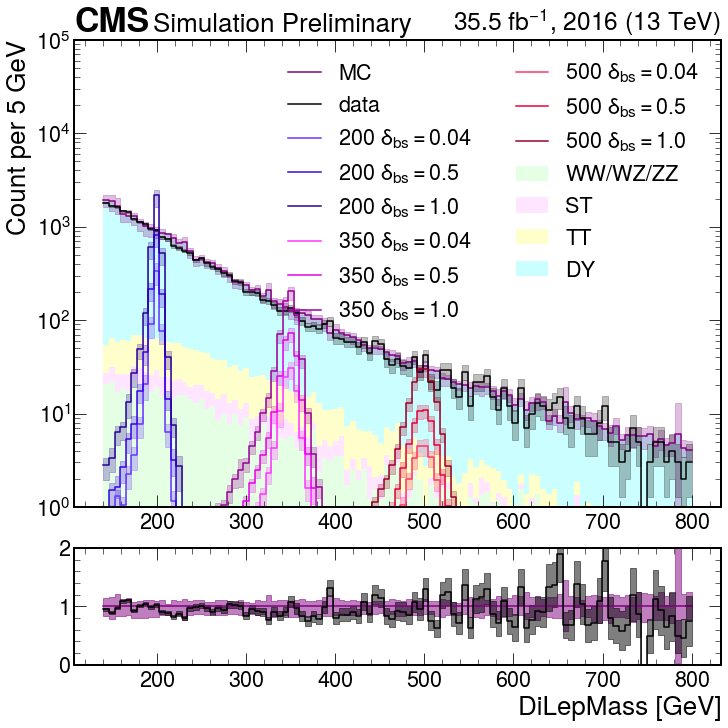

In [22]:
fig, top, bottom = ratio_plot_template( figsize=[10,10])
plot_region('CR10_{}',top,bottom,mc_color='purple')

11    WW/WZ/ZZ
12          ST
13          TT
14          DY
Name: hname, dtype: object
[(Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=24.4987, variance=10.0023) (WeightedSum(value=30.2398, variance=12.3945) with flow), Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=5.04764, variance=163.562) (WeightedSum(value=96.7176, variance=202.055) with flow), Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=-3.13266, variance=157.812) (WeightedSum(value=88.0584, variance=195.759) with flow)), (Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=439.752, variance=80.3658) (WeightedSum(value=479.597, variance=87.6367) with flow), Histogram(Regular(105, 800, 140, metadata='DiLepMass'), storage=Weight()) # Sum: WeightedSum(value=40.7542, variance=1301.3) (WeightedSum(value=684.28, variance=1419.29) wi

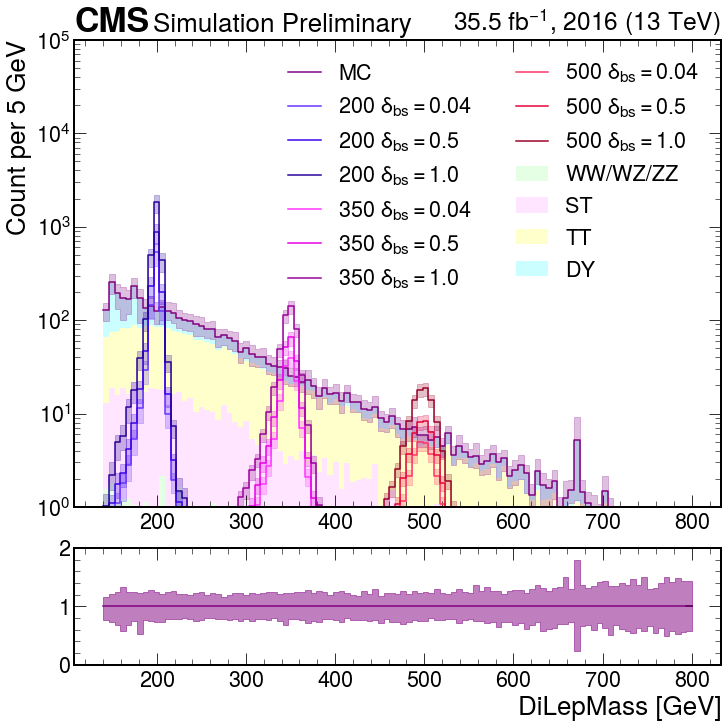

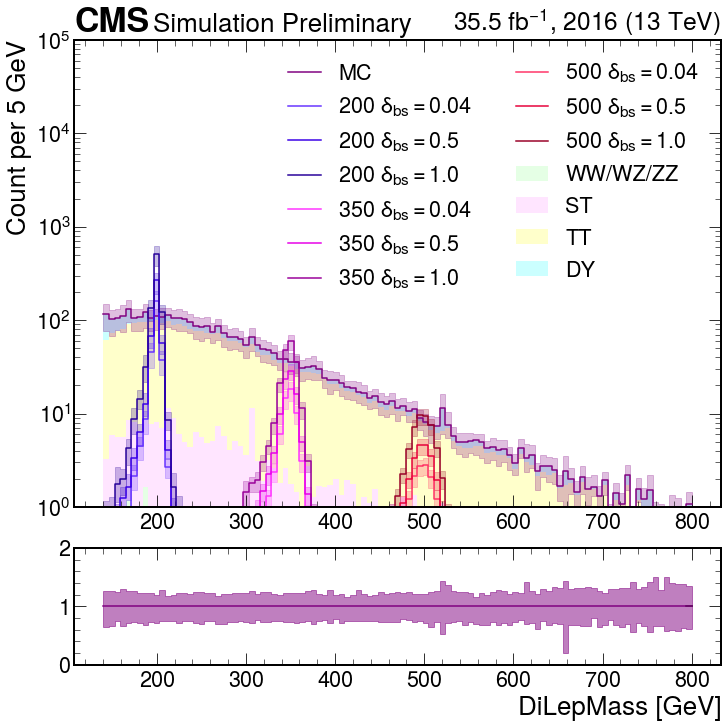

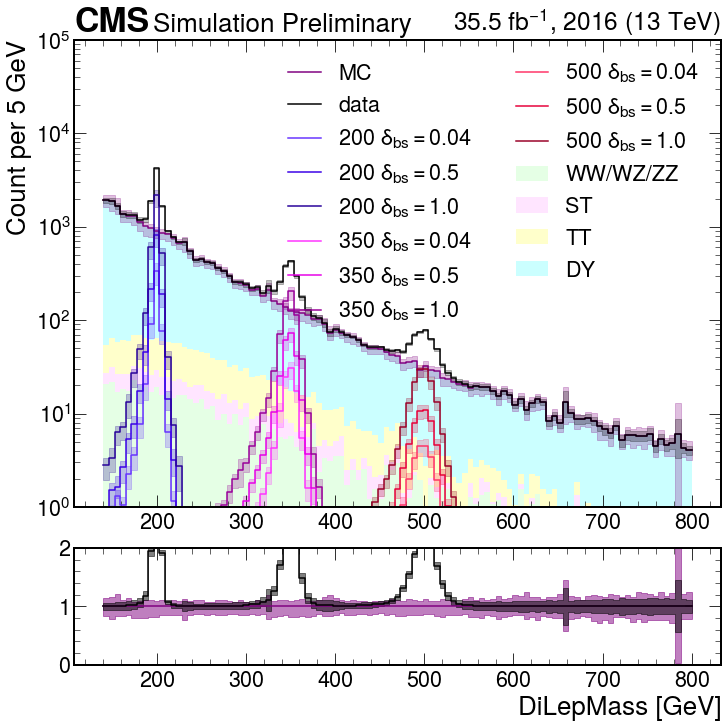

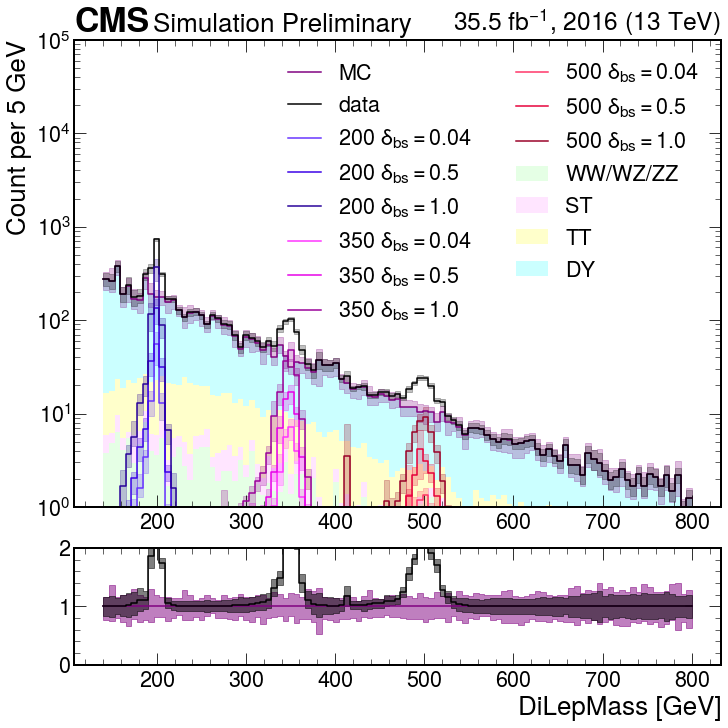

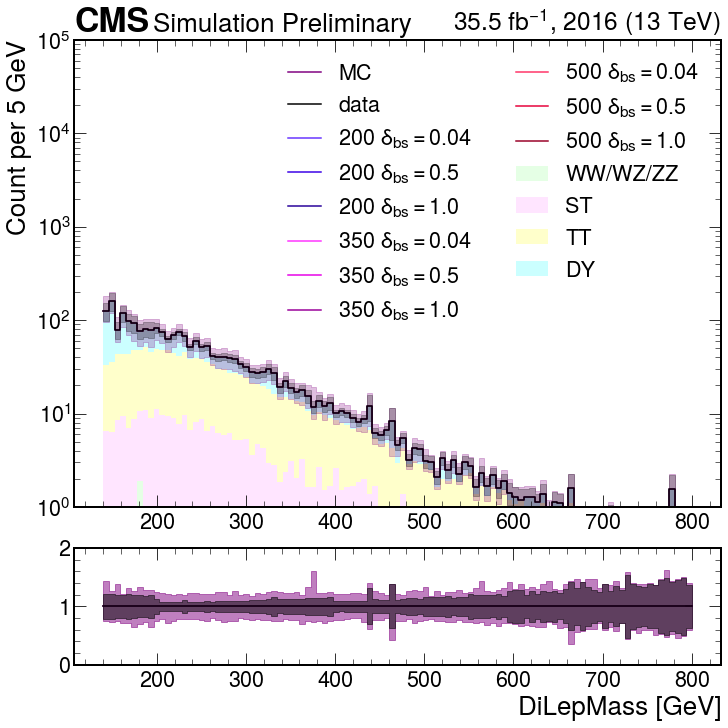

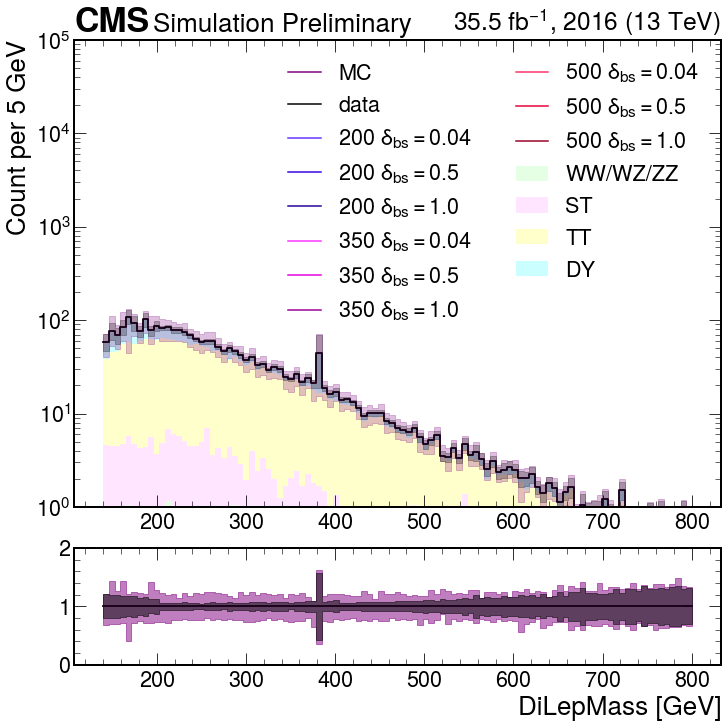

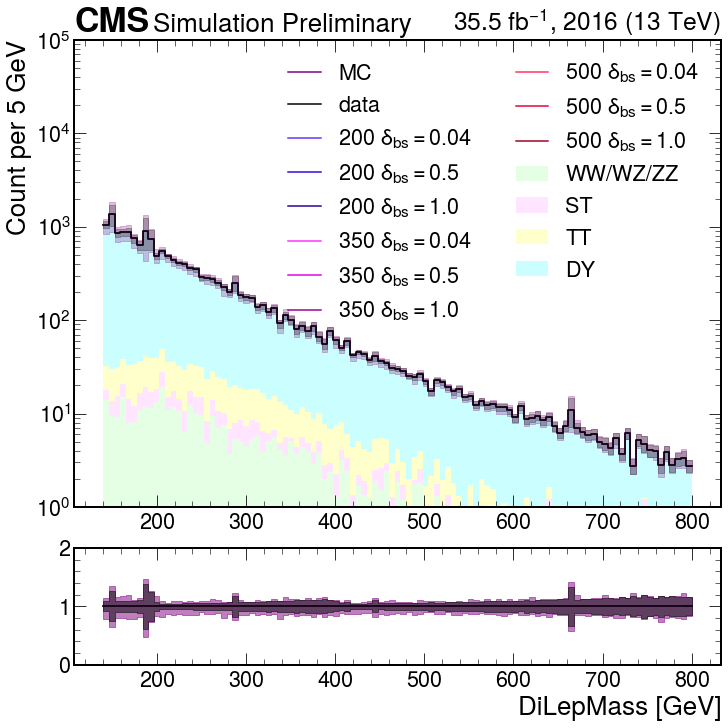

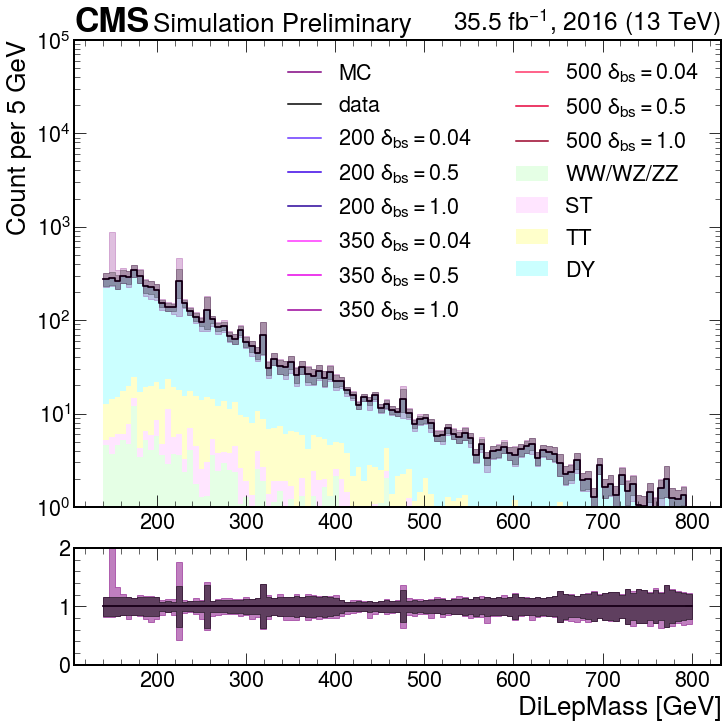

In [5]:
for key in reg_dict_temp:
    fig, top, bottom = ratio_plot_template( figsize=[10,10])
    plot_region(key,top,bottom,mc_color='purple')


In [16]:
one_jet_keys = {'SR1_{}':[0,0],
'CR10_{}':[1,0],
'CR13_{}':[0,1],
'CR14_{}':[1,1]}

[]
[0, 0]
[1, 0]
[0, 1]
[1, 1]


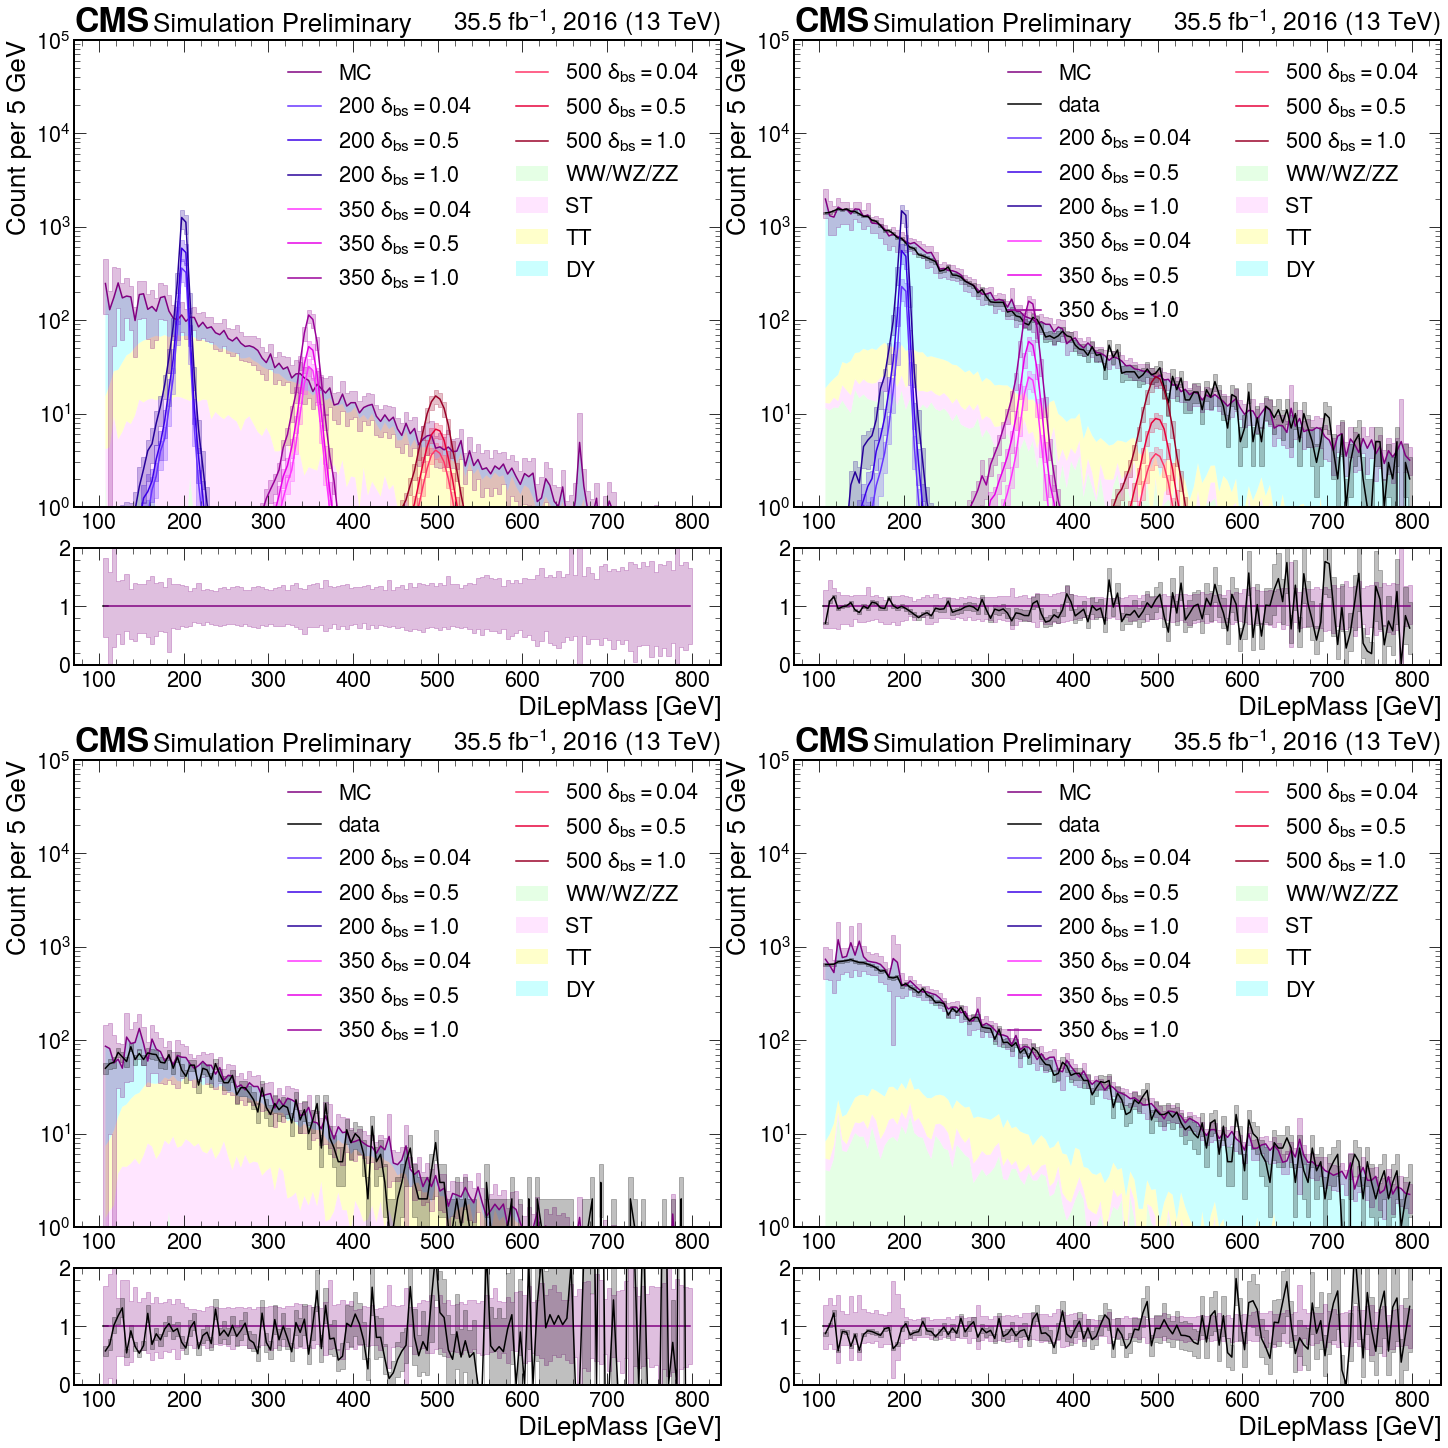

In [21]:
one_jet_keys = {'SR1_{}':[0,0],
'CR10_{}':[1,0],
'CR13_{}':[0,1],
'CR14_{}':[1,1]}
fig, axes = nratio_plot_template(nPlots=[2,2],figsize=[20,20])
for key in one_jet_keys:
    ai = one_jet_keys[key]
    print(ai)
    axs = axes[ai[0]][ai[1]]
    plot_region(key,*axs,mc_color='purple')
fig.savefig('output/{}_1.png'.format(pkl_name))

[]
[0, 0]
[1, 0]
[0, 1]
[1, 1]


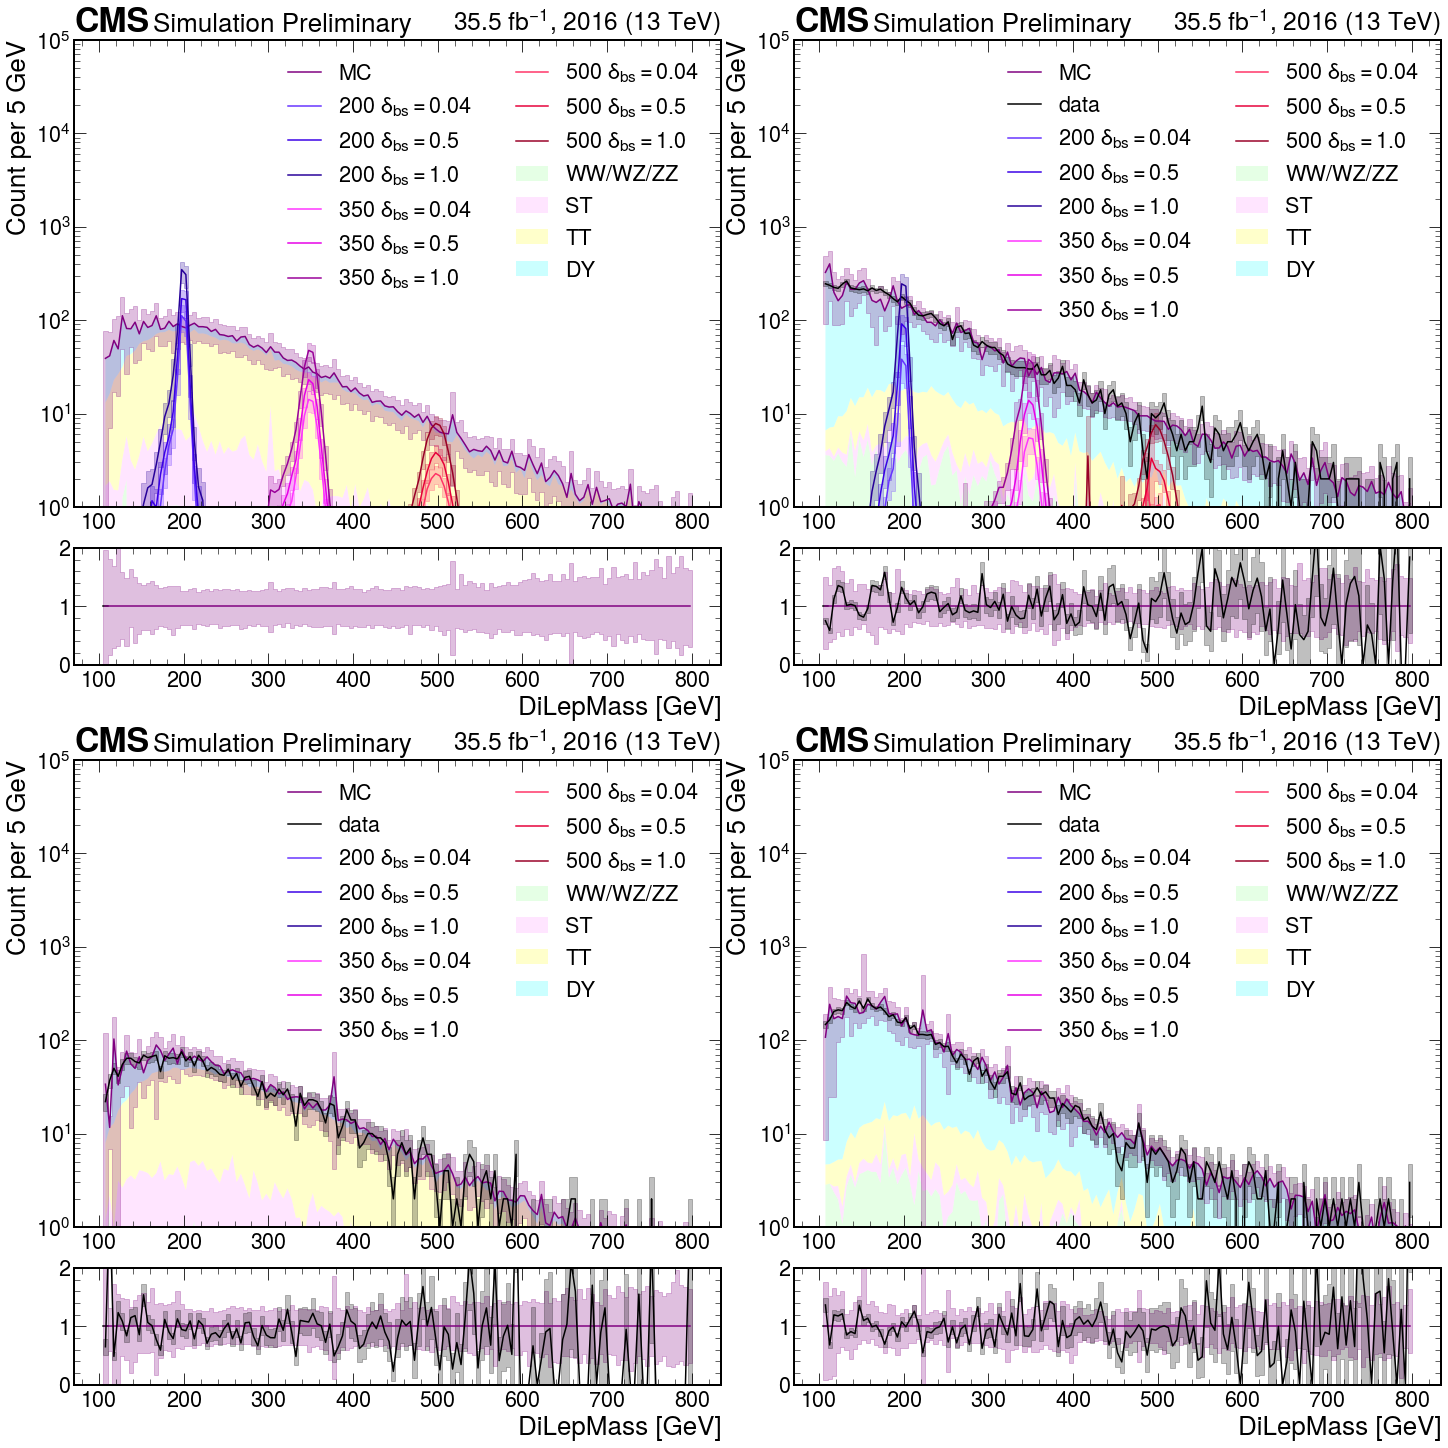

In [22]:
one_jet_keys = {'SR2_{}':[0,0],
'CR20_{}':[1,0],
'CR23_{}':[0,1],
'CR24_{}':[1,1]}
fig, axes = nratio_plot_template(nPlots=[2,2],figsize=[20,20])
for key in one_jet_keys:
    ai = one_jet_keys[key]
    print(ai)
    axs = axes[ai[0]][ai[1]]
    plot_region(key,*axs,mc_color='purple')
fig.savefig('output/{}_2.png'.format(pkl_name))